# Making the importation of the libraries

In [1]:
import pandas as pd
import numpy as np
import random
import zipfile
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
train = pd.read_csv('../input/new-york-city-taxi-fare-prediction/train.csv')
test = pd.read_csv('../input/new-york-city-taxi-fare-prediction/test.csv')

In [ ]:
train.shape

In [ ]:
train.head(10)

In [ ]:
train.dtypes

How the number of records is very large, I'll take a sample of the file so that it's easier to work with the data

In [ ]:
train = train.sample(n = 250000)

In [ ]:
train.shape

The 'key' and 'pickup_datetime' attributes are records that contain dates, let's convert them to dates. I will create a new file with only 250000 samples and do the conversion.

In [5]:
train.to_csv('train_sample.csv', index = False)
train = pd.read_csv('./train_sample.csv', parse_dates = ['key', 'pickup_datetime'])
train.shape
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2011-03-20 14:39:08.000000700,9.7,2011-03-20 14:39:08+00:00,-74.002509,40.733714,-73.973799,40.753278,1
1,2009-02-28 12:43:00.000000190,8.9,2009-02-28 12:43:00+00:00,-73.991007,40.750433,-73.991085,40.728695,1
2,2014-09-08 20:33:30.000000200,59.5,2014-09-08 20:33:30+00:00,-73.788396,40.647183,-73.998675,40.636292,1
3,2014-12-07 02:39:00.000000149,6.5,2014-12-07 02:39:00+00:00,-73.960998,40.772195,-73.968057,40.755730,1
4,2015-04-09 22:31:50.000000200,8.5,2015-04-09 22:31:50+00:00,-73.973740,40.784531,-73.955833,40.772251,5


In [6]:
train.dtypes

key                       datetime64[ns]
fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

# **We will now clean and manipulate the data**

Let's check for missing values:

In [7]:
train.isna().sum(axis = 0)

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

We have no missing values.

Let's check the 'key' and 'pickup_datetime':

(array([2273., 2547., 2552., 2577., 2487., 2634., 2419., 2302., 2473.,
        2329., 2460., 2589., 2643., 2567., 2648., 2255., 2229., 2316.,
        2377., 2567., 2873., 2483., 2671., 2430., 2231., 2158., 2359.,
        2604., 2647., 2412., 2089., 2520., 2731., 2777., 2606., 2757.,
        2827., 2543., 2527., 2639., 2238., 2621., 2672., 2599., 2687.,
        2585., 2530., 2676., 2788., 2740., 2706., 2838., 2666., 2716.,
        2517., 2485., 2552., 2590., 2436., 2369., 2730., 2228., 2661.,
        2611., 2717., 2703., 2722., 2647., 2592., 2428., 2144., 2359.,
        2485., 2588., 2700., 2494., 2382., 2271., 2530., 2639., 2636.,
        2547., 2609., 2452., 2277., 2410., 2180., 2322., 2364., 2515.,
        2367., 2404., 2066., 2234., 2339., 2365., 2237., 2399., 2328.,
        2179.]),
 array([733408.00927083, 733431.7291206 , 733455.44897037, 733479.16882014,
        733502.88866991, 733526.60851968, 733550.32836944, 733574.04821921,
        733597.76806898, 733621.48791875, 733645.2

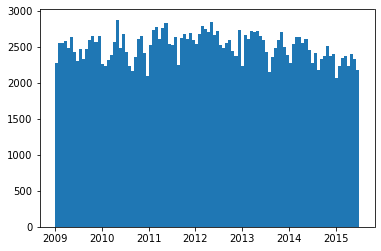

In [9]:
key = train['key']
#visualizing data distributions with 100 divisions(bins)::
plt.hist(key, bins = 100)

In [10]:
pdt = train['pickup_datetime']

In [11]:
key.describe()

count                            250000
unique                           249995
top       2014-11-21 00:11:00.000000140
freq                                  2
first     2009-01-01 00:13:21.000000400
last      2015-06-30 23:51:43.000000200
Name: key, dtype: object

In [12]:
pdt.describe()

count                        250000
unique                       244537
top       2011-05-20 19:44:00+00:00
freq                              4
first     2009-01-01 00:13:21+00:00
last      2015-06-30 23:51:43+00:00
Name: pickup_datetime, dtype: object

As we can see, the 'key' and 'pickup_datetime' columns have similar values for fist and last. We can associate this as an indication that the columns have the same values.

In [13]:
#eliminating seconds:
pdt = pdt.map(lambda date: date.tz_localize(None))
pdt

0        2011-03-20 14:39:08
1        2009-02-28 12:43:00
2        2014-09-08 20:33:30
3        2014-12-07 02:39:00
4        2015-04-09 22:31:50
                 ...        
249995   2011-05-19 07:01:00
249996   2013-08-07 06:33:00
249997   2010-04-09 01:09:34
249998   2009-05-13 08:27:00
249999   2013-05-02 20:23:49
Name: pickup_datetime, Length: 250000, dtype: datetime64[ns]

In [14]:
#key with same format as pdt:
key = pd.to_datetime(key.dt.strftime('%Y-%m-%d %H:%M:%S'))
key

0        2011-03-20 14:39:08
1        2009-02-28 12:43:00
2        2014-09-08 20:33:30
3        2014-12-07 02:39:00
4        2015-04-09 22:31:50
                 ...        
249995   2011-05-19 07:01:00
249996   2013-08-07 06:33:00
249997   2010-04-09 01:09:34
249998   2009-05-13 08:27:00
249999   2013-05-02 20:23:49
Name: key, Length: 250000, dtype: datetime64[ns]

Let's perform a logical command to find out if the columns actually have the same values:

In [15]:
(key == pdt)

0         True
1         True
2         True
3         True
4         True
          ... 
249995    True
249996    True
249997    True
249998    True
249999    True
Length: 250000, dtype: bool

In [16]:
(key == pdt).value_counts()

True    250000
dtype: int64

The key column is a primary key and is not used in machine learning models. Com has the same values as pickup_datetime, we will exclude it.

In [18]:
train.drop(['key'], axis = 1, inplace = True)
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,9.7,2011-03-20 14:39:08+00:00,-74.002509,40.733714,-73.973799,40.753278,1
1,8.9,2009-02-28 12:43:00+00:00,-73.991007,40.750433,-73.991085,40.728695,1
2,59.5,2014-09-08 20:33:30+00:00,-73.788396,40.647183,-73.998675,40.636292,1
3,6.5,2014-12-07 02:39:00+00:00,-73.960998,40.772195,-73.968057,40.755730,1
4,8.5,2015-04-09 22:31:50+00:00,-73.973740,40.784531,-73.955833,40.772251,5


In [19]:
#formatting:
train['pickup_datetime'] = pdt
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,9.7,2011-03-20 14:39:08,-74.002509,40.733714,-73.973799,40.753278,1
1,8.9,2009-02-28 12:43:00,-73.991007,40.750433,-73.991085,40.728695,1
2,59.5,2014-09-08 20:33:30,-73.788396,40.647183,-73.998675,40.636292,1
3,6.5,2014-12-07 02:39:00,-73.960998,40.772195,-73.968057,40.755730,1
4,8.5,2015-04-09 22:31:50,-73.973740,40.784531,-73.955833,40.772251,5


Now let's look at the coordinate attributes.

In [20]:
plon = train['pickup_longitude']
plon.describe()

count    250000.000000
mean        -72.484716
std          11.966123
min        -814.021850
25%         -73.992005
50%         -73.981783
75%         -73.967046
max        2539.068358
Name: pickup_longitude, dtype: float64

The max and min values are quite different from the mean and quartiles.

(array([1.00000e+00, 0.00000e+00, 0.00000e+00, 2.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 3.00000e+00, 2.45031e+05, 0.00000e+00,
        1.00000e+00, 4.83700e+03, 0.00000e+00, 1.24000e+02, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00

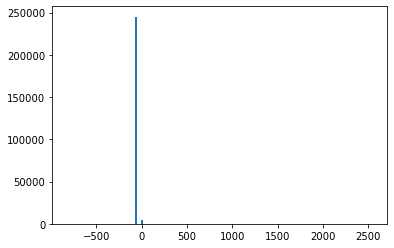

In [21]:
plt.hist(plon, bins = 150)

In [22]:
plon.median()

-73.981783

(array([2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00,
        0.0000e+00, 7.0000e+00, 2.0000e+00, 9.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+01, 2.0000e+00,
        0.0000e+00, 1.0000e+00, 1.0000e+00, 3.0000e+00, 2.0000e+00,
        2.0000e+00, 6.0000e+00, 7.0000e+00, 1.6000e+01, 2.2000e+01,
        4.6000e+01, 2.4000e+01, 7.4000e+01, 1.1091e+04, 1.8441e+05,
        3.8384e+04, 1.4870e+03, 5.1150e+03, 1.1300e+03, 2.9970e+03,
        4.1000e+01, 1.4000e+01, 5.0000e+00, 6.0000e+00, 2.0000e+00,
        6.0000e+00, 0.0000e+00, 2.0000e+00, 3.0000e+00, 2.0000e+00,
        1.0000e+00, 3.0000e+00, 1.0000e+00, 7.8000e+01, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

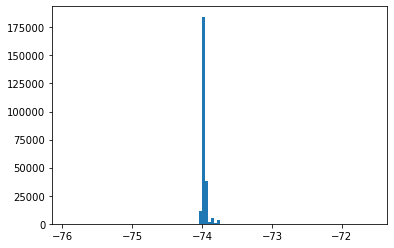

In [23]:
#A zoom:
plt.hist(plon[(plon > plon.median() - 2.5) & (plon < plon.median() + 2.5)], bins = 100)

In [24]:
##Let's eliminate the inconsistent values:
plon_val = (plon > plon.median() - 0.5) & (plon < plon.median() + 0.5)
plon_val.value_counts()

True     244890
False      5110
Name: pickup_longitude, dtype: int64

In [25]:
#percent:
print(plon_val.value_counts(), '\n', plon_val.value_counts(normalize = True))

True     244890
False      5110
Name: pickup_longitude, dtype: int64 
 True     0.97956
False    0.02044
Name: pickup_longitude, dtype: float64


In [26]:
plat = train['pickup_latitude']
plat.describe()

count    250000.000000
mean         39.900462
std           8.008867
min       -2528.979350
25%          40.734907
50%          40.752690
75%          40.767075
max          48.137268
Name: pickup_latitude, dtype: float64

(array([1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00

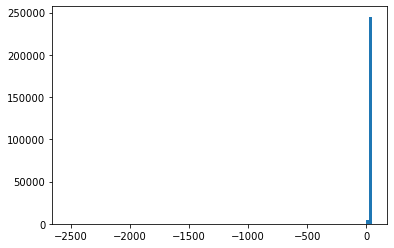

In [27]:
plt.hist(plat, bins = 100)

In [28]:
plat.median()

40.75269

(array([1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.90000e+01, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 1.00000e+01, 1.00000e+00, 1.00000e+00,
        1.00000e+00, 3.00000e+00, 2.00000e+00, 4.00000e+00, 5.00000e+00,
        1.00000e+01, 1.20000e+01, 7.50000e+01, 4.02300e+03, 3.18500e+03,
        6.42470e+04, 1.50805e+05, 2.17290e+04, 6.87000e+02, 8.70000e+01,
        2.80000e+01, 5.00000e+00, 6.00000e+00, 7.00000e+00, 2.00000e+00,
        0.00000e+00, 3.00000e+00, 3.00000e+00, 1.00000e+00, 0.00000e+00,
        2.00000e+00, 7.70000e+01, 1.00000e+00, 2.00000e+00, 0.00000e+00,
        2.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00

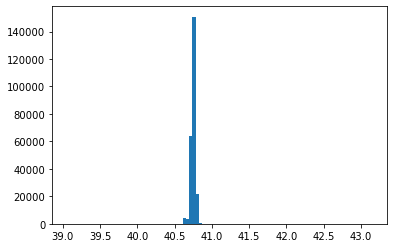

In [29]:
plt.hist(plat[(plat > plat.median() - 2.5) & (plat < plat.median() + 2.5)], bins = 100)

In [31]:
plat_val = (plat > plat.median() - 0.5) & (plat < plat.median() + 0.5)

True     244931
False      5069
Name: pickup_latitude, dtype: int64

In [32]:
#percent:
print(plat_val.value_counts(), '\n', plat_val.value_counts(normalize = True))

True     244931
False      5069
Name: pickup_latitude, dtype: int64 
 True     0.979724
False    0.020276
Name: pickup_latitude, dtype: float64


In [34]:
dlon = train['dropoff_longitude']
dlon.describe()

count    250000.000000
mean        -72.478853
std          11.802007
min        -736.350000
25%         -73.991430
50%         -73.980120
75%         -73.963597
max        2539.068358
Name: dropoff_longitude, dtype: float64

(array([2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        2.0000e+00, 4.0000e+00, 0.0000e+00, 4.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.2000e+01, 3.0000e+00,
        0.0000e+00, 1.0000e+00, 2.0000e+00, 3.0000e+00, 5.0000e+00,
        1.0000e+00, 1.1000e+01, 1.0000e+01, 1.6000e+01, 7.6000e+01,
        3.6400e+02, 5.0000e+01, 1.1800e+02, 8.5050e+03, 1.7458e+05,
        4.9486e+04, 4.2080e+03, 4.2260e+03, 1.0370e+03, 1.9440e+03,
        1.7200e+02, 3.7000e+01, 2.8000e+01, 9.0000e+00, 6.0000e+00,
        7.0000e+00, 6.0000e+00, 2.0000e+00, 0.0000e+00, 4.0000e+00,
        3.0000e+00, 0.0000e+00, 2.0000e+00, 1.0000e+00, 7.3000e+01,
        1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

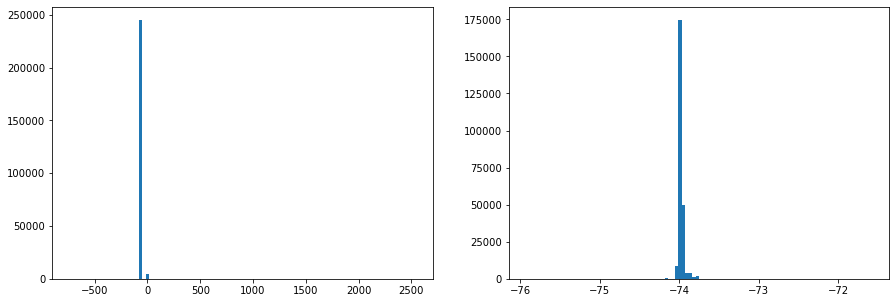

In [35]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5))
ax[0].hist(dlon, bins = 100)
ax[1].hist(dlon[(dlon > dlon.median() - 2.5) & (dlon < dlon.median() + 2.5)], bins = 100)

In [38]:
dlon_val = (dlon > dlon.median() - 0.5) & (dlon < dlon.median() + 0.5)

In [39]:
#percent
print(dlon_val.value_counts(), '\n', dlon_val.value_counts(normalize = True))

True     244900
False      5100
Name: dropoff_longitude, dtype: int64 
 True     0.9796
False    0.0204
Name: dropoff_longitude, dtype: float64


In [41]:
dlat = train['dropoff_latitude']
dlat.describe()

count    250000.000000
mean         39.895695
std          10.620224
min       -3112.278967
25%          40.733910
50%          40.753197
75%          40.768209
max        1436.071000
Name: dropoff_latitude, dtype: float64

(array([1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.30000e+01,
        1.20000e+01, 1.00000e+00, 2.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        1.10000e+01, 1.00000e+00, 0.00000e+00, 1.00000e+00, 3.00000e+00,
        1.00000e+00, 3.00000e+00, 3.00000e+00, 8.00000e+00, 1.40000e+01,
        4.30000e+01, 3.64000e+02, 2.71900e+03, 5.00800e+03, 3.07360e+04,
        1.19809e+05, 7.63160e+04, 7.80400e+03, 1.63700e+03, 3.52000e+02,
        4.90000e+01, 1.00000e+01, 1.10000e+01, 1.40000e+01, 7.00000e+00,
        1.00000e+00, 0.00000e+00, 5.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 2.00000e+00, 7.30000e+01, 0.00000e+00, 2.00000e+00,
        1.00000e+00, 2.00000e+00, 0.00000e+00, 1.00

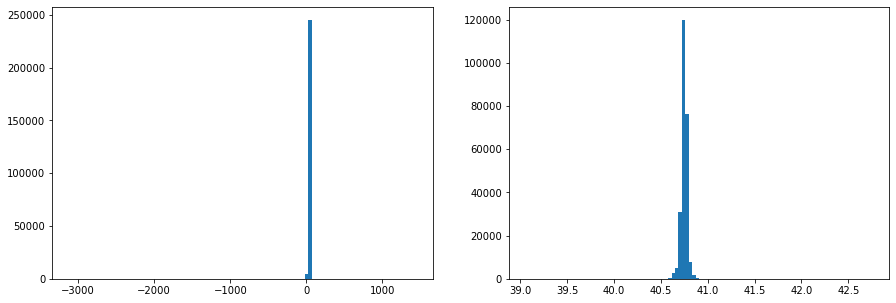

In [42]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5))
ax[0].hist(dlat, bins = 100)
ax[1].hist(dlat[(dlat > dlat.median() - 2.5) & (dlat < dlat.median() + 2.5)], bins = 100)

In [43]:
dlat_val = (dlat > dlat.median() - 0.5) & (dlat < dlat.median() + 0.5)

In [44]:
#percent
print(dlat_val.value_counts(), '\n', dlat_val.value_counts(normalize = True))

True     244918
False      5082
Name: dropoff_latitude, dtype: int64 
 True     0.979672
False    0.020328
Name: dropoff_latitude, dtype: float64


Let's do an analysis of the passenger_count column

In [46]:
pcount = train['passenger_count']
pcount.describe()

count    250000.000000
mean          1.686016
std           1.373957
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         208.000000
Name: passenger_count, dtype: float64

It is very strange that a taxi takes 0 people, just as it is impossible to take more than 200 people in a single car. Let's see how many numbers 0 we have and the mean:

In [47]:
print((pcount == 0).sum(), (pcount == 0).mean())

915 0.00366


(array([2.10621e+05, 1.63900e+04, 2.29880e+04, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00

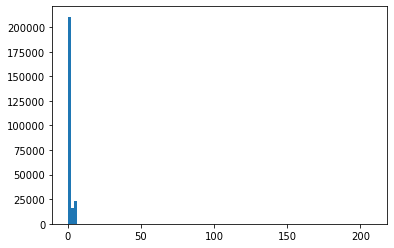

In [48]:
plt.hist(pcount, bins = 100)

(array([   915.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 173026.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,  36680.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,  11035.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,   5355.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,  17543.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
      

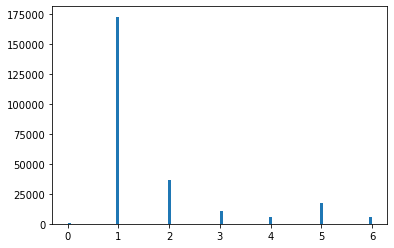

In [49]:
plt.hist(pcount[pcount < 15], bins = 100)

In [51]:
pcount_val = (pcount >= 1) & (pcount <= 6)
print(pcount_val.value_counts(), '\n', pcount_val.value_counts(normalize = True))

True     249084
False       916
Name: passenger_count, dtype: int64 
 True     0.996336
False    0.003664
Name: passenger_count, dtype: float64


Analyzing the fare_amount

In [53]:
fare = train['fare_amount']
fare.describe()

count    250000.000000
mean         11.348573
std           9.831726
min         -52.000000
25%           6.000000
50%           8.500000
75%          12.500000
max         274.000000
Name: fare_amount, dtype: float64

(array([1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 4.0000e+00, 3.0000e+00,
        1.6000e+01, 4.0180e+03, 7.9843e+04, 6.8919e+04, 3.9679e+04,
        1.9233e+04, 1.1957e+04, 5.6150e+03, 4.1420e+03, 3.2580e+03,
        2.6280e+03, 2.0410e+03, 1.2940e+03, 9.8600e+02, 1.1810e+03,
        3.4000e+02, 2.2570e+03, 1.7200e+02, 1.6010e+03, 1.4800e+02,
        1.0500e+02, 7.4000e+01, 6.9000e+01, 6.6000e+01, 4.0000e+01,
        4.8000e+01, 3.2000e+01, 4.7000e+01, 2.2000e+01, 1.6000e+01,
        1.6000e+01, 2.1000e+01, 9.0000e+00, 5.0000e+00, 7.0000e+00,
        6.0000e+00, 5.0000e+00, 1.2000e+01, 9.0000e+00, 6.0000e+00,
        3.0000e+00, 2.0000e+00, 4.0000e+00, 8.0000e+00, 2.0000e+00,
        4.0000e+00, 2.0000e+00, 3.0000e+00, 4.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 3.0000e+00, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 2.0000e+00, 0.0000e+00, 0.00

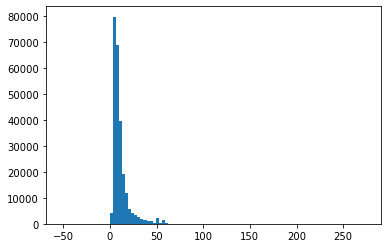

In [54]:
plt.hist(fare, bins = 100)

(array([1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 1.00

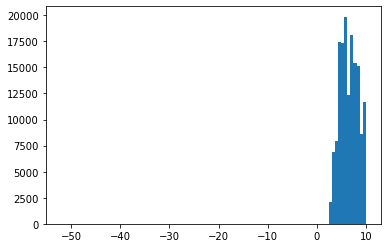

In [57]:
plt.hist(fare[fare < 10], bins = 100)

(array([6.65e+02, 1.15e+02, 1.05e+02, 1.56e+03, 1.12e+02, 6.30e+01,
        8.20e+01, 5.20e+01, 6.00e+01, 3.50e+01, 3.80e+01, 4.40e+01,
        2.00e+01, 4.00e+01, 1.80e+01, 3.40e+01, 2.70e+01, 2.00e+01,
        1.00e+01, 9.00e+00, 1.50e+01, 9.00e+00, 1.30e+01, 7.00e+00,
        6.00e+00, 1.00e+00, 6.00e+00, 5.00e+00, 2.00e+00, 5.00e+00,
        3.00e+00, 1.20e+01, 6.00e+00, 5.00e+00, 2.00e+00, 2.00e+00,
        1.00e+00, 3.00e+00, 2.00e+00, 2.00e+00, 7.00e+00, 1.00e+00,
        4.00e+00, 0.00e+00, 2.00e+00, 3.00e+00, 2.00e+00, 2.00e+00,
        1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 3.00e+00, 2.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 2.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 1.00e+00, 0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 

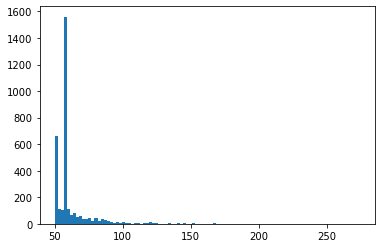

In [58]:
plt.hist(fare[fare > 50], bins = 100)

In the graphs we can see that low values, close to zero are very difficult, as well as values that exceed the value of $ 150. Then we will filter within that range.

In [60]:
fare_val = (fare > 2) & (fare < 150)
print(fare_val.value_counts(), '\n', fare_val.value_counts(normalize = True))

True     249950
False        50
Name: fare_amount, dtype: int64 
 True     0.9998
False    0.0002
Name: fare_amount, dtype: float64


I will exclude the variables outside the established ranges and form the database for the training.

In [62]:
#concatenating the values:
val_entries = fare_val & plon_val & plat_val & dlon_val & dlat_val & pcount_val
print(val_entries.value_counts(), '\n', val_entries.value_counts(normalize = True))

True     243621
False      6379
dtype: int64 
 True     0.974484
False    0.025516
dtype: float64


In [64]:
train = train.drop(val_entries[val_entries == False].index)
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,9.7,2011-03-20 14:39:08,-74.002509,40.733714,-73.973799,40.753278,1
1,8.9,2009-02-28 12:43:00,-73.991007,40.750433,-73.991085,40.728695,1
2,59.5,2014-09-08 20:33:30,-73.788396,40.647183,-73.998675,40.636292,1
3,6.5,2014-12-07 02:39:00,-73.960998,40.772195,-73.968057,40.755730,1
4,8.5,2015-04-09 22:31:50,-73.973740,40.784531,-73.955833,40.772251,5


In [65]:
train.shape

(243621, 7)

#  **Create new features**
We can see that distance and duration are important for determining the tariff. But we also see that there are no such characteristics. Something that influences the duration of the trip is the traffic condition.

In [67]:
train['hour_of_day'] = train['pickup_datetime'].map(lambda date: date.timetuple().tm_hour)
train['day_of_week'] = train['pickup_datetime'].map(lambda date: date.timetuple().tm_wday)
train['day_of_year'] = train['pickup_datetime'].map(lambda date: date.timetuple().tm_yday)
train['year'] = train['pickup_datetime'].map(lambda date: date.timetuple().tm_year)
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour_of_day,day_of_week,day_of_year,year
0,9.7,2011-03-20 14:39:08,-74.002509,40.733714,-73.973799,40.753278,1,14,6,79,2011
1,8.9,2009-02-28 12:43:00,-73.991007,40.750433,-73.991085,40.728695,1,12,5,59,2009
2,59.5,2014-09-08 20:33:30,-73.788396,40.647183,-73.998675,40.636292,1,20,0,251,2014
3,6.5,2014-12-07 02:39:00,-73.960998,40.772195,-73.968057,40.755730,1,2,6,341,2014
4,8.5,2015-04-09 22:31:50,-73.973740,40.784531,-73.955833,40.772251,5,22,3,99,2015


We are working with day of the week and year, and considering holidays and breaks. There are leap years in the database, it is from 2009 to 2015, and that gets in the way because if a holiday is on the 34th, with the leap year, it becomes the 35th. First let's see how many records we have on the 29th of February.

In [68]:
len(train['pickup_datetime'][train['pickup_datetime'].dt.strftime('%m-%d') == '02-29'])

108

As they are just 108, it is a small value compared to all abse of data, so we will exclude it

In [69]:
train.drop(train['pickup_datetime'][train['pickup_datetime'].dt.strftime('%m-%d') == '02-29'].index, inplace = True)

In [70]:
train.shape

(243513, 11)

As we excluded the 29th, we will have to fix the year 2012 because otherwise we will have the holidays on the wrong days. The condition will be 59 days because 31 days (like August, for example) + 28 (February) = 59. And make the correcting the extra days left over because of the leap year, for example, if before it was the 61st, it returns to the 60th.

In [72]:
condition = (train['year'] == 2012) & (train['day_of_year'] > 59)
train['day_of_year'][condition] = train['day_of_year'] - 1

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Year')

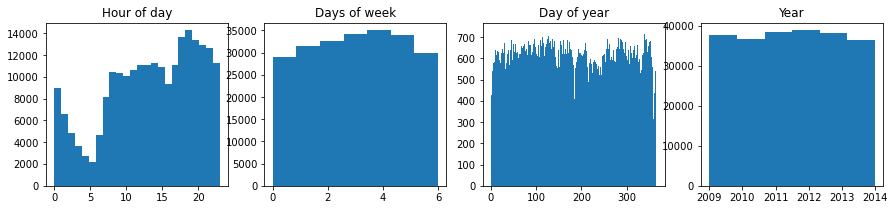

In [73]:
fig, ax = plt.subplots(1, 4, figsize = (15,3))
train_not_2015 = train[train['year'] < 2015] # we won't use 2015 because we only have the dates until half of the year
ax[0].hist(train_not_2015['hour_of_day'], bins = 24) # 24 hours in a day
ax[0].set_title('Hour of day')
ax[1].hist(train_not_2015['day_of_week'], bins = 7) # 7 days in a week
ax[1].set_title('Days of week')
ax[2].hist(train_not_2015['day_of_year'], bins = 365) # 365 days
ax[2].set_title('Day of year')
ax[3].hist(train_not_2015['year'], bins = 6) # we have 6 years
ax[3].set_title('Year')

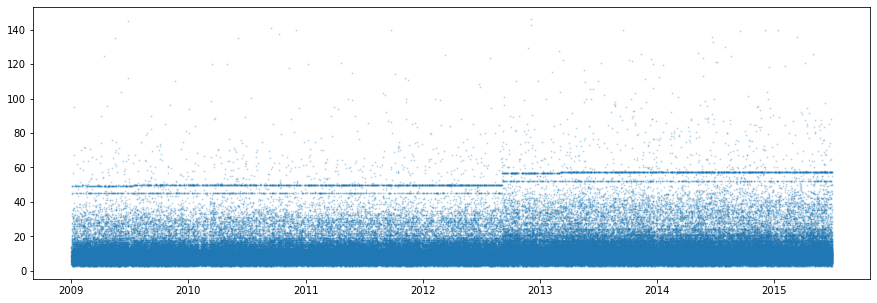

In [74]:
plt.figure(figsize = (15, 5))
plt.scatter(train['pickup_datetime'], train['fare_amount'], s = 1, alpha = 0.2)

We can see that we have a pattern forming straight horizontal lines, that means fixed rate, since a path that has a preset value. Let's zoom in on these records for a more detailed view:

In [77]:
from collections import Counter
fare_zoom = train['fare_amount'][(train['fare_amount'] > 40) & (train['fare_amount'] < 60)]

In [78]:
common_fares_zoom = Counter(fare_zoom)

It will count the tariffs, for example: $ 40 there are 7 records. Soon after we will see which are the most common 

In [79]:
common_fares_zoom

Counter({59.5: 14,
         45.0: 641,
         42.83: 39,
         49.57: 491,
         52.0: 451,
         57.54: 164,
         45.04: 2,
         49.83: 10,
         40.33: 36,
         48.33: 12,
         56.9: 4,
         46.9: 5,
         49.8: 789,
         43.0: 23,
         50.65: 1,
         41.3: 29,
         58.67: 1,
         44.33: 22,
         44.8: 6,
         56.8: 221,
         42.27: 2,
         41.83: 43,
         42.0: 33,
         43.33: 27,
         57.33: 1047,
         49.15: 138,
         40.5: 53,
         41.7: 27,
         50.1: 4,
         40.83: 46,
         57.87: 1,
         42.5: 59,
         50.04: 3,
         44.9: 15,
         58.3: 3,
         45.83: 17,
         53.0: 24,
         58.6: 1,
         49.0: 12,
         44.65: 1,
         48.5: 20,
         40.54: 9,
         41.5: 39,
         50.5: 58,
         44.83: 24,
         41.54: 11,
         49.5: 14,
         59.7: 3,
         56.0: 13,
         44.0: 31,
         48.0: 16,
         41.0:

In [82]:
most_common_fares_zoom = common_fares_zoom.most_common(10)
most_common_fares_zoom

[(57.33, 1047),
 (49.8, 789),
 (45.0, 641),
 (49.57, 491),
 (52.0, 451),
 (56.8, 221),
 (57.54, 164),
 (49.15, 138),
 (50.0, 74),
 (42.5, 59)]

<BarContainer object of 10 artists>

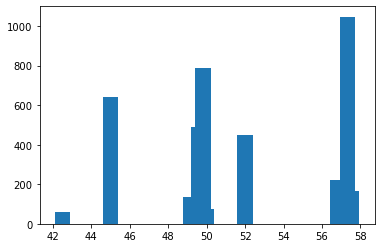

In [83]:
plt.bar([x[0] for x in most_common_fares_zoom], [x[1] for x in most_common_fares_zoom])

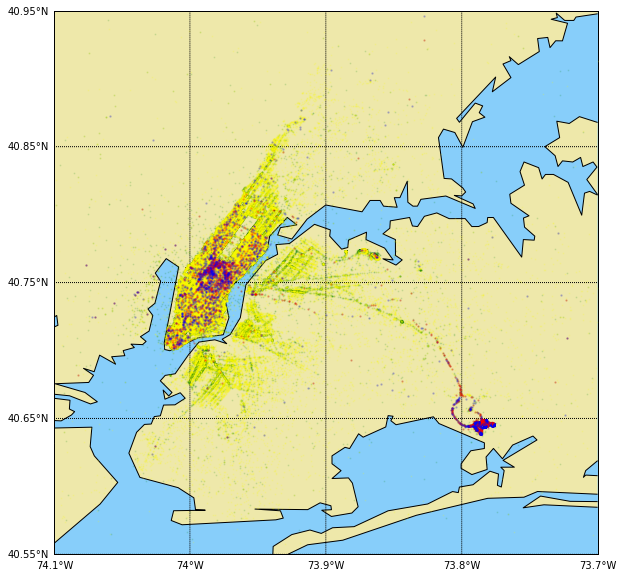

In [91]:
from mpl_toolkits.basemap import Basemap
#NYC latitude and longitude definition
lat1, lat2 = 40.55, 40.95
lon1, lon2 = -74.10, -73.70

plt.figure(figsize = (10, 10))
m = Basemap(projection = 'cyl', resolution = 'h',
            llcrnrlat = lat1, urcrnrlat = lat2,
            llcrnrlon = lon1, urcrnrlon = lon2)
m.drawcoastlines()
m.fillcontinents(color = 'palegoldenrod', lake_color = 'lightskyblue')
m.drawmapboundary(fill_color = 'lightskyblue')
m.drawparallels(np.arange(lat1, lat2 + 0.05, 0.1), labels = [1, 0, 0, 0])
m.drawmeridians(np.arange(lon1, lon2 + 0.05, 0.1), labels = [0, 0, 0, 1])

#Pickup locations - of all exits (green)
m.scatter(train['pickup_longitude'], train['pickup_latitude'], s = 1, c = 'green',
          alpha = 0.1, zorder = 5)
#Dropoof locations - of all exits (yellow)
m.scatter(train['dropoff_longitude'], train['dropoff_latitude'], s = 1, c='yellow',
         alpha = 0.1, zorder = 5)
for i in [0, 1, 2, 4]:
  this_fare = most_common_fares_zoom[i][0]
  this_df = train[train['fare_amount'] == this_fare]
  #pickup location - red
  m.scatter(this_df['pickup_longitude'], this_df['pickup_latitude'], s = 2, c = 'red',
           alpha = 0.2, zorder = 5)
  #dropoff location - blue
  m.scatter(this_df['dropoff_longitude'], this_df['dropoff_latitude'], s = 2, c = 'blue',
           alpha = 0.2, zorder = 5)

Let's create a new variable called 'coordinates' to be able to zoom in on the points located on the map where the fixed rates are:

In [92]:
#Arrival point coordinates
coords = train[['dropoff_latitude',
                'dropoff_longitude']][(train['fare_amount'] > 40) &
                                       (train['fare_amount'] < 60) &
                                       (train['dropoff_latitude'] < 40.7) &
                                       (train['dropoff_latitude'] > 40.6) &
                                       (train['dropoff_longitude'] < -73.7) &
                                       (train['dropoff_longitude'] > -73.9)]

In [93]:
coords.shape

(1647, 2)

In [94]:
coords.head()

,dropoff_latitude,dropoff_longitude
242,40.645978,-73.776345
849,40.648742,-73.783205
947,40.646377,-73.787422
1213,40.644111,-73.782508
2045,40.644207,-73.782338


If we take the mean latitude and longitude, we can play on Google Maps and find the real location. Let's see:

In [95]:
print(coords['dropoff_latitude'].median(), coords['dropoff_longitude'].median())

40.645112 -73.786333


![IMAGE](https://drive.google.com/file/d/1Gv-ttT5bv6h57LoCI8FYJpZzCgp1h9t1/view?usp=sharing)

In [97]:
#Starting point coordinates
coords = train[['dropoff_latitude',
                'dropoff_longitude']][(train['fare_amount'] > 40) &
                                       (train['fare_amount'] < 60) &
                                       (train['dropoff_latitude'] < 40.85) &
                                       (train['dropoff_latitude'] > 40.7) &
                                       (train['dropoff_longitude'] < -73.9) &
                                       (train['dropoff_longitude'] > -74.1)]
print(coords['dropoff_latitude'].median(), coords['dropoff_longitude'].median())

40.754707 -73.98374


![IMAGE](https://drive.google.com/file/d/18Xtflx7mvncHnW3XfcSSU7NV2XcrCt3E/view?usp=sharing)

We can see that the fixed rates have their standard going from the city center to the international airport. Now let's see if there is a relationship between number of passengers and fares:

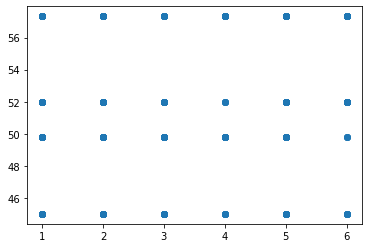

In [106]:
filtered = train[['fare_amount', 
                  'passenger_count']][((train['fare_amount'] == most_common_fares_zoom[0][0]) |
                                       (train['fare_amount'] == most_common_fares_zoom[1][0]) |
                                       (train['fare_amount'] == most_common_fares_zoom[2][0]) |
                                       (train['fare_amount'] == most_common_fares_zoom[4][0]))&
                                       (train['fare_amount'] < 60) &
                                       (train['dropoff_latitude'] < 40.7) & 
                                       (train['dropoff_latitude'] > 40.6) & 
                                       (train['dropoff_longitude'] < -73.7) &
                                       (train['dropoff_longitude'] > -73.9)]
plt.scatter(filtered['passenger_count'], filtered['fare_amount'])

As we can see, the number of passengers does not change the amount to be paid in the fare.
Let's see if the tariff has anything to do with the day of the week, year and time:

Text(0.5, 1.0, 'Day of year')

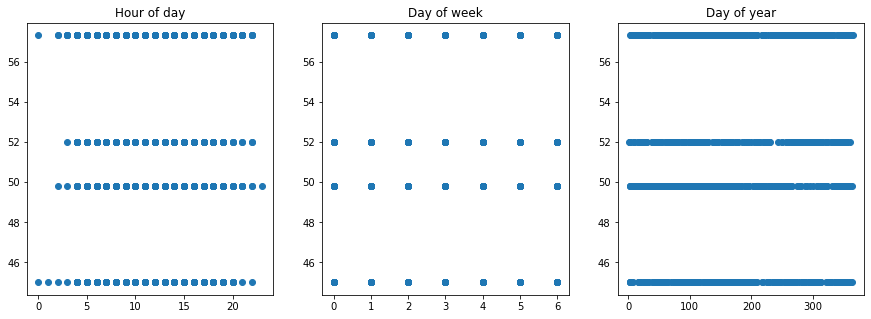

In [103]:
filtered2 = train[['fare_amount', 
                  'hour_of_day',
                  'day_of_week',
                  'day_of_year']][((train['fare_amount'] == most_common_fares_zoom[0][0]) |
                                       (train['fare_amount'] == most_common_fares_zoom[1][0]) |
                                       (train['fare_amount'] == most_common_fares_zoom[2][0]) |
                                       (train['fare_amount'] == most_common_fares_zoom[4][0]))&
                                       (train['fare_amount'] < 60) &
                                       (train['dropoff_latitude'] < 40.7) & 
                                       (train['dropoff_latitude'] > 40.6) & 
                                       (train['dropoff_longitude'] < -73.7) &
                                       (train['dropoff_longitude'] > -73.9)]

fig, ax = plt.subplots(1, 3, figsize = (15, 5))
ax[0].scatter(filtered2['hour_of_day'], filtered2['fare_amount'])
ax[0].set_title('Hour of day')
ax[1].scatter(filtered2['day_of_week'], filtered2['fare_amount'])
ax[1].set_title('Day of week')
ax[2].scatter(filtered2['day_of_year'], filtered2['fare_amount'])
ax[2].set_title('Day of year')

We can see that these variables do not change the rate.

In [108]:
train.drop('pickup_datetime', axis = 1, inplace = True)
train.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour_of_day,day_of_week,day_of_year,year
0,9.7,-74.002509,40.733714,-73.973799,40.753278,1,14,6,79,2011
1,8.9,-73.991007,40.750433,-73.991085,40.728695,1,12,5,59,2009
2,59.5,-73.788396,40.647183,-73.998675,40.636292,1,20,0,251,2014
3,6.5,-73.960998,40.772195,-73.968057,40.755730,1,2,6,341,2014
4,8.5,-73.973740,40.784531,-73.955833,40.772251,5,22,3,99,2015


We know that distance influences the tariff, so let's see what is the best way to calculate it and use it in the model:

In [112]:
#conversion to radians:
lon1, lon2 = np.radians(train['pickup_longitude']), np.radians(train['dropoff_longitude'])
lat1, lat2 = np.radians(train['pickup_latitude']), np.radians(train['dropoff_latitude'])
#subtraction from the start point to the end point:
dlon = lon2 - lon1
dlat = lat2 - lat1

In [114]:
#Euclidean Distance (Km)
a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
train['eucl_distance'] = 6373 * c

train.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour_of_day,day_of_week,day_of_year,year,eucl_distance
0,9.7,-74.002509,40.733714,-73.973799,40.753278,1,14,6,79,2011,3.254098
1,8.9,-73.991007,40.750433,-73.991085,40.728695,1,12,5,59,2009,2.417923
2,59.5,-73.788396,40.647183,-73.998675,40.636292,1,20,0,251,2014,17.789021
3,6.5,-73.960998,40.772195,-73.968057,40.755730,1,2,6,341,2014,1.925535
4,8.5,-73.973740,40.784531,-73.955833,40.772251,5,22,3,99,2015,2.034750


In [116]:
#Manhattan Distance (Km)
a1 = np.sin(dlon / 2)**2
c1 = 2 * np.arctan2(np.sqrt(a1), np.sqrt(1 - a1))
a2 = np.sin(dlat / 2)**2
c2 = 2 * np.arctan2(np.sqrt(a2), np.sqrt(1 - a2))
train['manh_distance'] = 6373 * (c1 + c2)

train.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour_of_day,day_of_week,day_of_year,year,eucl_distance,manh_distance
0,9.7,-74.002509,40.733714,-73.973799,40.753278,1,14,6,79,2011,3.254098,5.369509
1,8.9,-73.991007,40.750433,-73.991085,40.728695,1,12,5,59,2009,2.417923,2.426590
2,59.5,-73.788396,40.647183,-73.998675,40.636292,1,20,0,251,2014,17.789021,24.600702
3,6.5,-73.960998,40.772195,-73.968057,40.755730,1,2,6,341,2014,1.925535,2.616571
4,8.5,-73.973740,40.784531,-73.955833,40.772251,5,22,3,99,2015,2.034750,3.357550


Text(0.5, 1.0, 'Manhattan Distance')

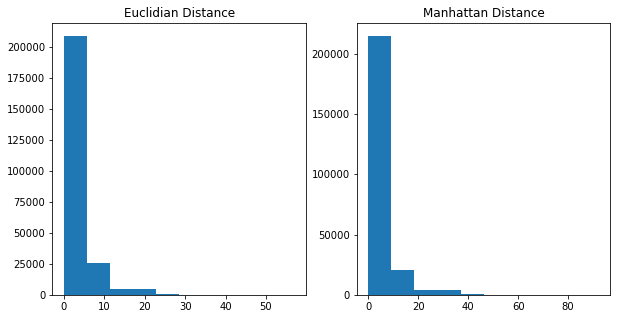

In [117]:
fig, ax = plt.subplots(1, 2, figsize = (10,5))
ax[0].hist(train['eucl_distance'])
ax[0].set_title('Euclidian Distance')
ax[1].hist(train['manh_distance'])
ax[1].set_title('Manhattan Distance')

# **Now creating the predictive attributes and the response attribute**

In [120]:
X_train = train.drop('fare_amount', axis = 1)
Y_train = train['fare_amount']

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour_of_day,day_of_week,day_of_year,year,eucl_distance,manh_distance
0,-74.002509,40.733714,-73.973799,40.753278,1,14,6,79,2011,3.254098,5.369509
1,-73.991007,40.750433,-73.991085,40.728695,1,12,5,59,2009,2.417923,2.426590
2,-73.788396,40.647183,-73.998675,40.636292,1,20,0,251,2014,17.789021,24.600702
3,-73.960998,40.772195,-73.968057,40.755730,1,2,6,341,2014,1.925535,2.616571
4,-73.973740,40.784531,-73.955833,40.772251,5,22,3,99,2015,2.034750,3.357550


Let's normalize the data as they are on different scales:

In [125]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

array([[0.4731094 , 0.50093205, 0.50474935, ..., 0.33333333, 0.05703858,
        0.0581522 ],
       [0.48484827, 0.51886404, 0.48719032, ..., 0.        , 0.04238191,
        0.02628016],
       [0.69163175, 0.40812308, 0.47948044, ..., 0.83333333, 0.31181002,
        0.26642751],
       ...,
       [0.52002507, 0.54115059, 0.53039207, ..., 0.16666667, 0.012918  ,
        0.01288108],
       [0.48886124, 0.49158798, 0.47515011, ..., 0.        , 0.04307427,
        0.04143678],
       [0.47957384, 0.49950555, 0.49699376, ..., 0.66666667, 0.02625997,
        0.02682224]])

In [131]:
from sklearn.model_selection import cross_val_score
cv = 3
scoring = 'neg_mean_squared_error'
import multiprocessing
n_jobs = multiprocessing.cpu_count() - 1

3

# **Comparing the models:**

In [149]:
#Linear Regression:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
scores = cross_val_score(model, X_train_scaled, Y_train, cv = cv,
                         scoring = scoring, n_jobs = n_jobs)
np.sqrt(-scores.mean())

4.757723056208104

In [153]:
#Ridge Regression:
from sklearn.linear_model import Ridge
model = Ridge()
scores = cross_val_score(model, X_train_scaled, Y_train, cv = cv,
                         scoring = scoring, n_jobs = n_jobs)
np.sqrt(-scores.mean())

4.758038736102072

In [157]:
#Lasso Regression:
from sklearn.linear_model import Lasso
model = Lasso()
scores = cross_val_score(model, X_train_scaled, Y_train, cv = cv,
                         scoring = scoring, n_jobs = n_jobs)
np.sqrt(-scores.mean())

9.622548069332906

In [161]:
#Nearest Neighbors:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor()
scores = cross_val_score(model, X_train_scaled, Y_train, cv = cv,
                         scoring = scoring, n_jobs = n_jobs)
np.sqrt(-scores.mean())

5.24868360650123

In [165]:
#Decision Tree:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
scores = cross_val_score(model, X_train_scaled, Y_train, cv = cv,
                         scoring = scoring, n_jobs = n_jobs)
np.sqrt(-scores.mean())

5.344720153473866

In [169]:
#Random Forest:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
scores = cross_val_score(model, X_train_scaled, Y_train, cv = cv,
                         scoring = scoring, n_jobs = n_jobs)
np.sqrt(-scores.mean())

3.8108025768633227

In [253]:
#Deep Learning:
from sklearn.neural_network import MLPRegressor
model = MLPRegressor()
scores = cross_val_score(model, X_train_scaled, Y_train, cv = cv,
                         scoring = scoring, n_jobs = n_jobs)
np.sqrt(-scores.mean())

4.421071457403872

In [173]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()
scores = cross_val_score(model, X_train_scaled, Y_train, cv = cv,
                         scoring = scoring, n_jobs = n_jobs)
np.sqrt(-scores.mean())

3.9402949331525154

In [174]:
from sklearn.model_selection import train_test_split
X_train1, X_test, Y_train1, Y_test = train_test_split(X_train_scaled, Y_train,test_size = 0.2, random_state = 24)

In [201]:
model = RandomForestRegressor(n_estimators = 150)
model.fit(X_train1, Y_train1)

features_importances = model.feature_importances_
argsort = np.argsort(features_importances) #making a ordering of importances
features_importances_sorted = features_importances[argsort]

In [202]:
feature_names = X_train.columns
features_sorted = feature_names[argsort]

<BarContainer object of 11 artists>

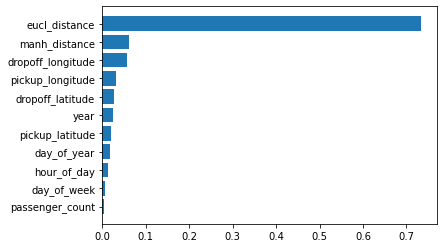

In [203]:
plt.barh(features_sorted, features_importances_sorted)

In [209]:
Y_pred = model.predict(X_test)

In [211]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)

In [212]:
mse

14.405118535595935

In [213]:
rmse

3.7954075585628395

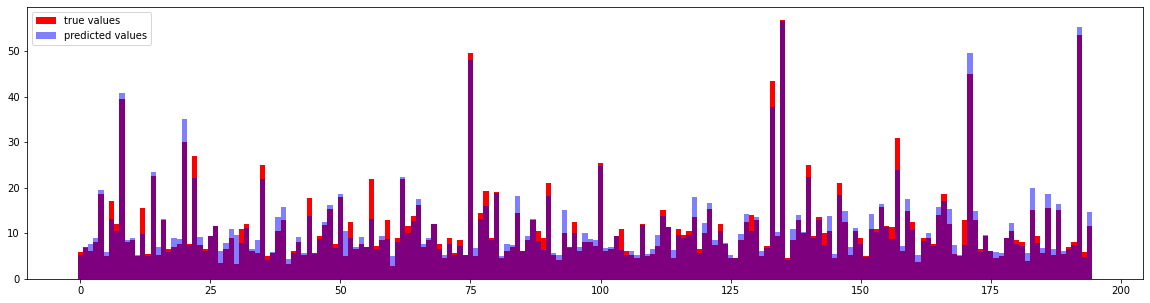

In [215]:
print_every = int(250000 / 1000)

fig = plt.figure(figsize=(20,5))
plt.bar(list(range(len(Y_test[::print_every]))), Y_test.values[::print_every],
        alpha = 1, color = 'red', width = 1, label = 'true values')
plt.bar(list(range(len(Y_pred[::print_every]))), Y_pred[::print_every],
        alpha = 0.5, color = 'blue', width = 1, label = 'predicted values')
plt.legend()

In [236]:
test = pd.read_csv('../input/new-york-city-taxi-fare-prediction/test.csv',parse_dates = ['pickup_datetime'])

In [238]:
key = test['key']

0       2015-01-27 13:08:24.0000002
1       2015-01-27 13:08:24.0000003
2       2011-10-08 11:53:44.0000002
3       2012-12-01 21:12:12.0000002
4       2012-12-01 21:12:12.0000003
                   ...             
9909    2015-05-10 12:37:51.0000002
9910    2015-01-12 17:05:51.0000001
9911    2015-04-19 20:44:15.0000001
9912    2015-01-31 01:05:19.0000005
9913    2015-01-18 14:06:23.0000006
Name: key, Length: 9914, dtype: object

In [243]:
#Data
pdt = test['pickup_datetime']
pdt = pdt.map(lambda date: date.tz_localize(None))
test.drop(['key'], axis = 1, inplace=True)
test['pickup_datetime'] = pdt

#New attributes
test['day_of_week'] = test['pickup_datetime'].map(lambda date: date.timetuple().tm_wday)
test['day_of_year'] = test['pickup_datetime'].map(lambda date: date.timetuple().tm_yday)
test['year'] = test['pickup_datetime'].map(lambda date: date.timetuple().tm_year)
test['hour_of_day'] = test['pickup_datetime'].map(lambda date: date.timetuple().tm_hour)
test.drop('pickup_datetime', axis = 1, inplace = True)

#Distance
lon1, lon2 = np.radians(test['pickup_longitude']), np.radians(test['dropoff_longitude'])
lat1, lat2 = np.radians(test['pickup_latitude']), np.radians(test['dropoff_latitude'])
dlon = lon2 - lon1
dlat = lat2 - lat1

a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
test['eucl_distance'] = 6373 * c

a1 = np.sin(dlon/2)**2
c1 = 2 * np.arctan2(np.sqrt(a1), np.sqrt(1-a1))
a2 = np.sin(dlat/2)**2
c2 = 2 * np.arctan2(np.sqrt(a2), np.sqrt(1-a2))
test['manh_distance'] = 6373 * (c1+c2)

In [245]:
X_test = test
X_test_scaled = scaler.transform(X_test) #scaled between 0 and 1

In [246]:
Y_pred = model.predict(X_test)

In [249]:
sub = pd.DataFrame({'key': key, 'fare_amount': Y_pred})
sub.head()
sub.to_csv('submission.csv', index = False)